In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv", na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
sns.set_style('whitegrid')

# Preprocessing and data cleaning

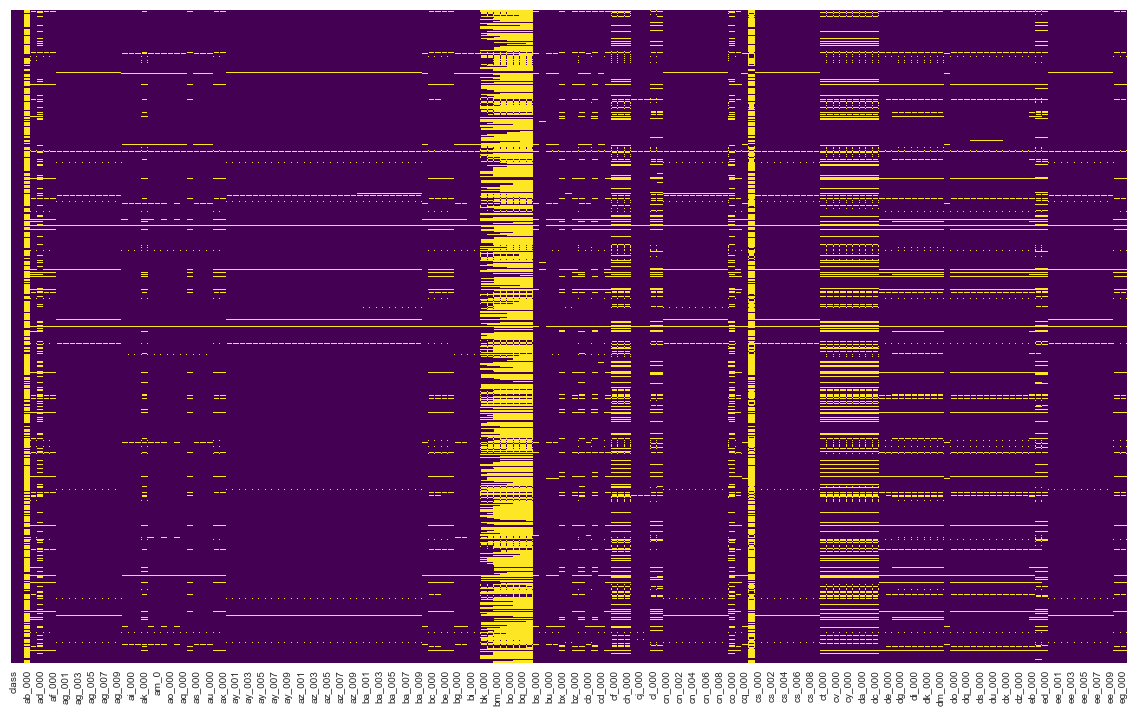

In [4]:
#for fininding missing values
#this headmap is illustrating the missing values with yellow bars

plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having more than 10,000 missing values (**Ref)
2. Removing the column having 80% missing values (**Self intuition)
3. Keeping all the features
4. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

# First Approach

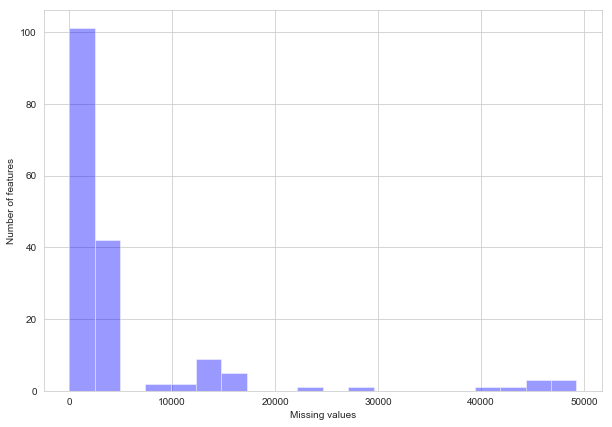

In [5]:
missing_data = training_data.isna().sum().to_frame()

plt.figure(figsize=(10,7))
ax= sns.distplot(missing_data[0],kde = False,bins = 20,color='b')
ax.set(xlabel='Missing values', ylabel='Number of features')
plt.show()

In [6]:
missing_data[missing_data[0]>10000]

,0
ab_000,46329
ad_000,14861
bk_000,23034
bl_000,27277
bm_000,39549
bn_000,44009
bo_000,46333
bp_000,47740
bq_000,48722
br_000,49264


<b>we are dropping the columns that have more than 10,000 missing values</b>

In [7]:
#sample_data varible holds the data for approach one
temp = "ab_000 ad_000 bk_000 bl_000 bm_000 bn_000 bo_000 bp_000 bq_000 br_000 cf_000 cg_000 ch_000 co_000 cr_000 ct_000 cu_000 cv_000 cx_000 cy_000 cz_000 da_000 db_000 dc_000 ec_00"
temp = temp.split()

sample_data = training_data.drop(temp,axis=1)
sample_data.head()

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


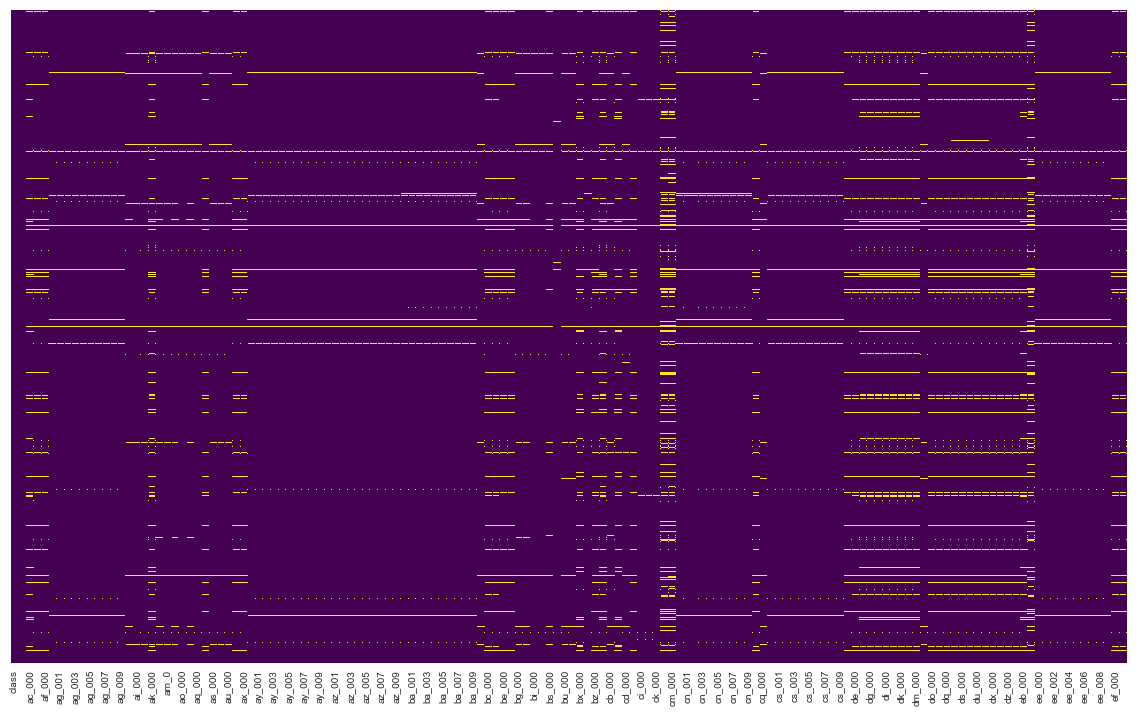

In [8]:
#after dropping columns having more than 10,000 missing values
plt.figure(figsize=(20,12))
sns.heatmap(sample_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Here we can see much improvement in the heatmap</b><br>
For the rest of the values we are going to replace them with their mean() -- (**Ref)

In [9]:
sample_data.fillna(sample_data.mean(),inplace=True)

After mean(), the heatmap for missing values will look like

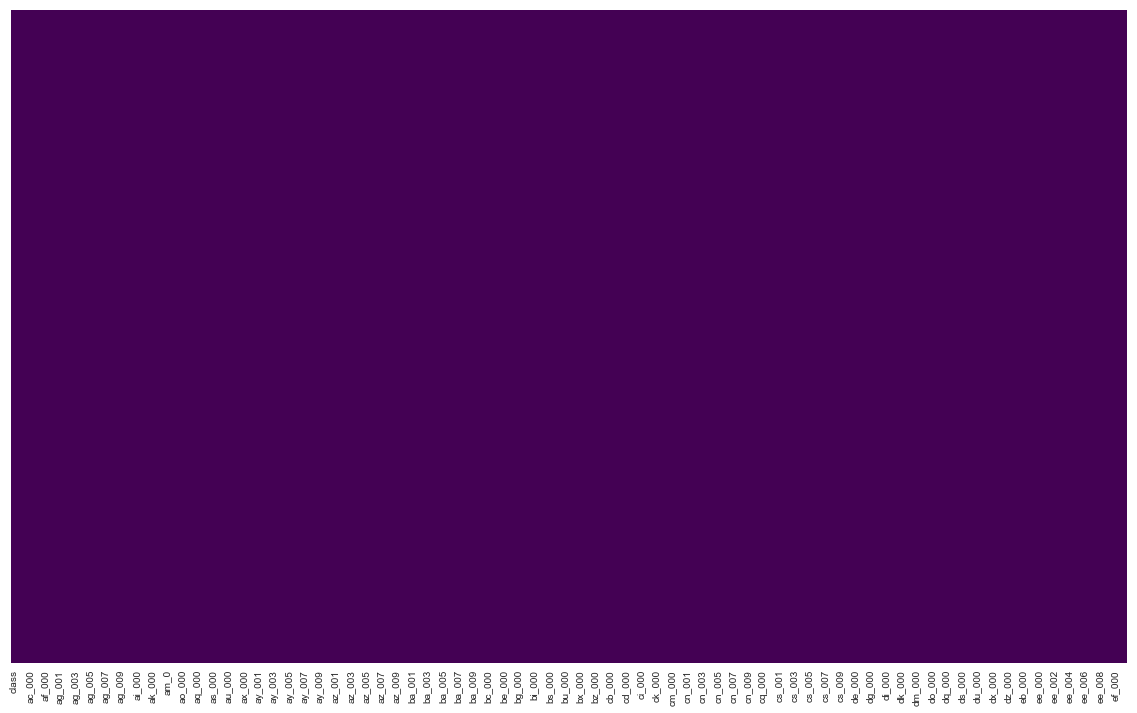

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(sample_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>So we have handled the missing value problem in this approach</b>

<b>Now We need to handle the classification variables(class) by taking a dummy value instead of a string</b>

In [11]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_data = sample_data.replace('neg',0)
sample_data = sample_data.replace('pos',1)

sample_data.head(15)

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,9128.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,0,14,6.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1202.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,102960,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,2130.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,0,78696,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,458.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204,1.820000e+02,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


# Model implementation

<b><font size = 5px>First Approach</big></b><br>
<b>As our data is ready, so here we are going to try to model and fit our dataset with logistic regression model</b>

In [12]:
#here the predictors (X) and responce (y) is separated from the sample_data for this model

X = sample_data.drop('class',axis=1)
y = sample_data['class']

In [13]:
X.head()

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

<b>Although we have our separate test data, but for chekcking this time we are going to split out training data into (train,test) where test data will have 30% portion of the entire training data</b>

In [1]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()

In [19]:
#fitting the data
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
prediction = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17691
           1       0.78      0.61      0.68       309

   micro avg       0.99      0.99      0.99     18000
   macro avg       0.89      0.80      0.84     18000
weighted avg       0.99      0.99      0.99     18000



<b>Here we can see, Negative class prediction is about 99% correct , where Positive class prediction guarantees upto 78%</b><br>
Now, for the cost

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()

In [25]:
cost = 10*fp+500*fn

In [26]:
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,61530,53,122


<b>By observing this , we can see that estimation for "Number of Type 1 faults" is quite good , on the other hand estimation for "Number of Type 2 faults " is not that good </b>

# Visualization

<b>Classification Report</b>

In [27]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

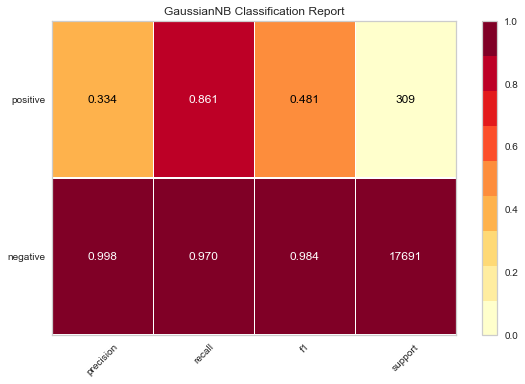

In [28]:

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=["negative", "positive"], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [29]:
temp =sample_data.columns.tolist()

<Figure size 504x360 with 0 Axes>

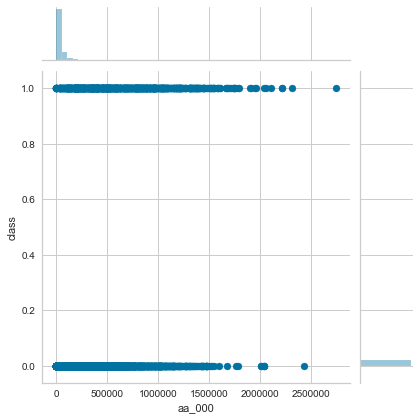

<Figure size 504x360 with 0 Axes>

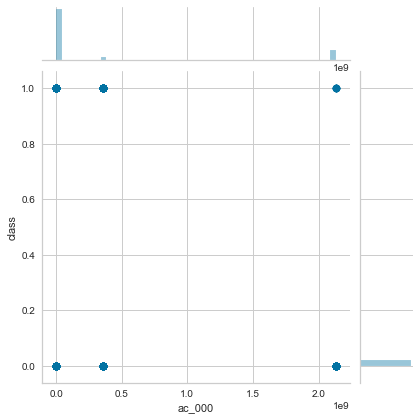

<Figure size 504x360 with 0 Axes>

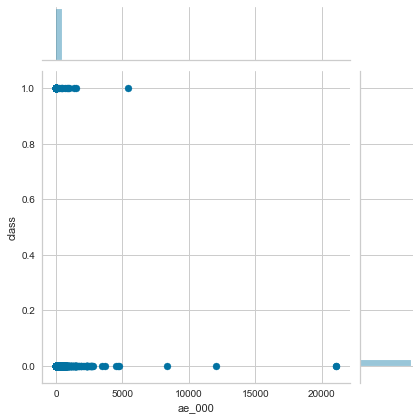

<Figure size 504x360 with 0 Axes>

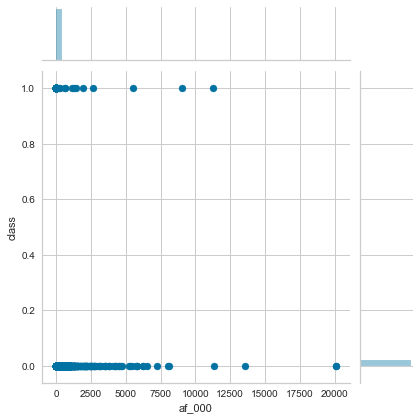

<Figure size 504x360 with 0 Axes>

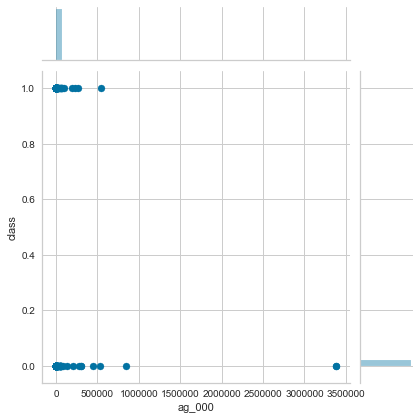

<Figure size 504x360 with 0 Axes>

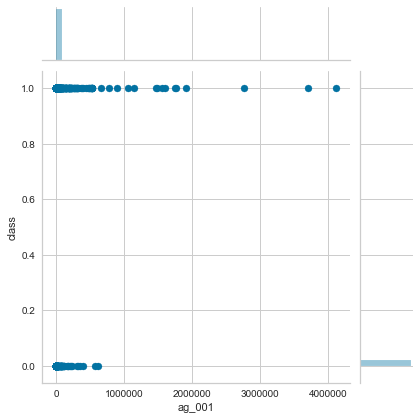

<Figure size 504x360 with 0 Axes>

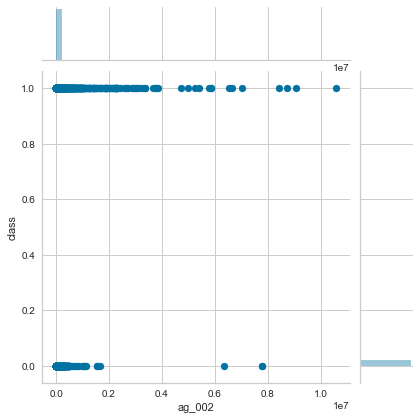

<Figure size 504x360 with 0 Axes>

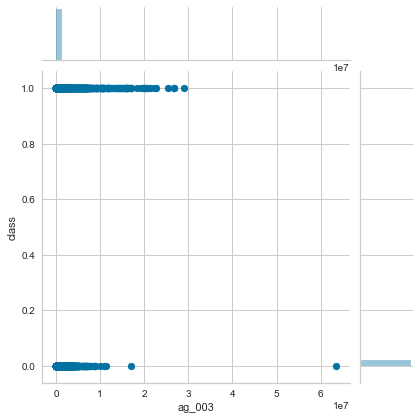

<Figure size 504x360 with 0 Axes>

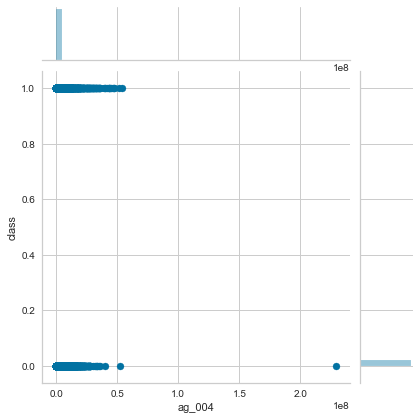

<Figure size 504x360 with 0 Axes>

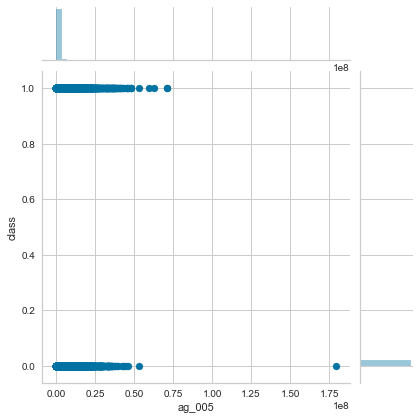

In [30]:
for i in range(10):
    plt.figure(figsize=(7,5))
    sns.jointplot(temp[i+1],'class',data = sample_data)
    print()